In [12]:
import sys
import numpy as np
import librosa, pretty_midi
import pandas as pd
#import madmom
import soundfile as sf

In [13]:
#load performance.mp3
y, sr = librosa.load('performance.mp3', sr=44100,duration=45)
#load score_midi.mp3
score, sr = librosa.load('score_midi.mp3', sr=44100,duration=45)

#save both as mp3
sf.write('performance.wav', y, sr)
sf.write('score.wav', score, sr)

In [14]:
def align_spectra(score_midi, perf, fs=44100, stride=512, n_fft=4096):
    #score_synth = pretty_midi.PrettyMIDI(score_midi).fluidsynth(fs=fs)
    score_synth, _ = librosa.load(score_midi + '.wav', sr=fs)
    perf,_ = librosa.load(perf + '.wav', sr=fs)
    score_spec = np.abs(librosa.stft(y=score_synth, hop_length=stride, n_fft=n_fft))**2
    score_logspec = librosa.power_to_db(score_spec, ref=score_spec.max())
    perf_spec = np.abs(librosa.stft(y=perf, hop_length=stride, n_fft=n_fft))**2
    perf_logspec = librosa.power_to_db(perf_spec, ref=perf_spec.max())
    D, wp = librosa.sequence.dtw(X=score_logspec, Y=perf_logspec)
    path = np.array(list(reversed(np.asarray(wp))))
    
    return np.array([(s,t) for s,t in dict(reversed(wp)).items()])*(stride/fs), D

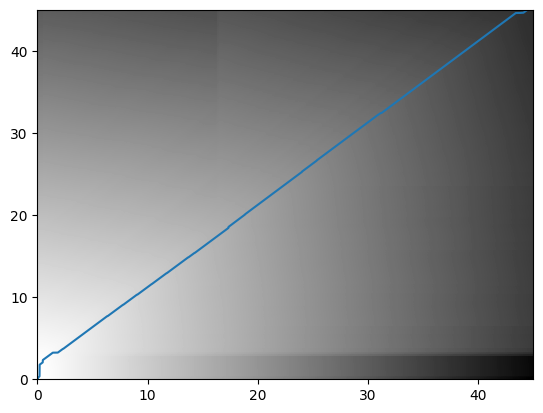

In [15]:
path,D=align_spectra('score', 'performance')
fs=44100
stride=512
# Compute frame indices for path
n_frames, m_frames = D.shape
path_frames = (path / (stride / fs) * fs).astype(int)

# Compute extent for imshow
x_extent = 0, n_frames * (stride / fs)
y_extent = 0, m_frames * (stride / fs)

#plot path
import matplotlib.pyplot as plt
plt.plot(path[:,0], path[:,1])
#Plot D in the background
plt.imshow(D.T, origin='lower', cmap='gray_r', aspect='auto',
           extent=x_extent + y_extent, interpolation='nearest')

plt.show()
